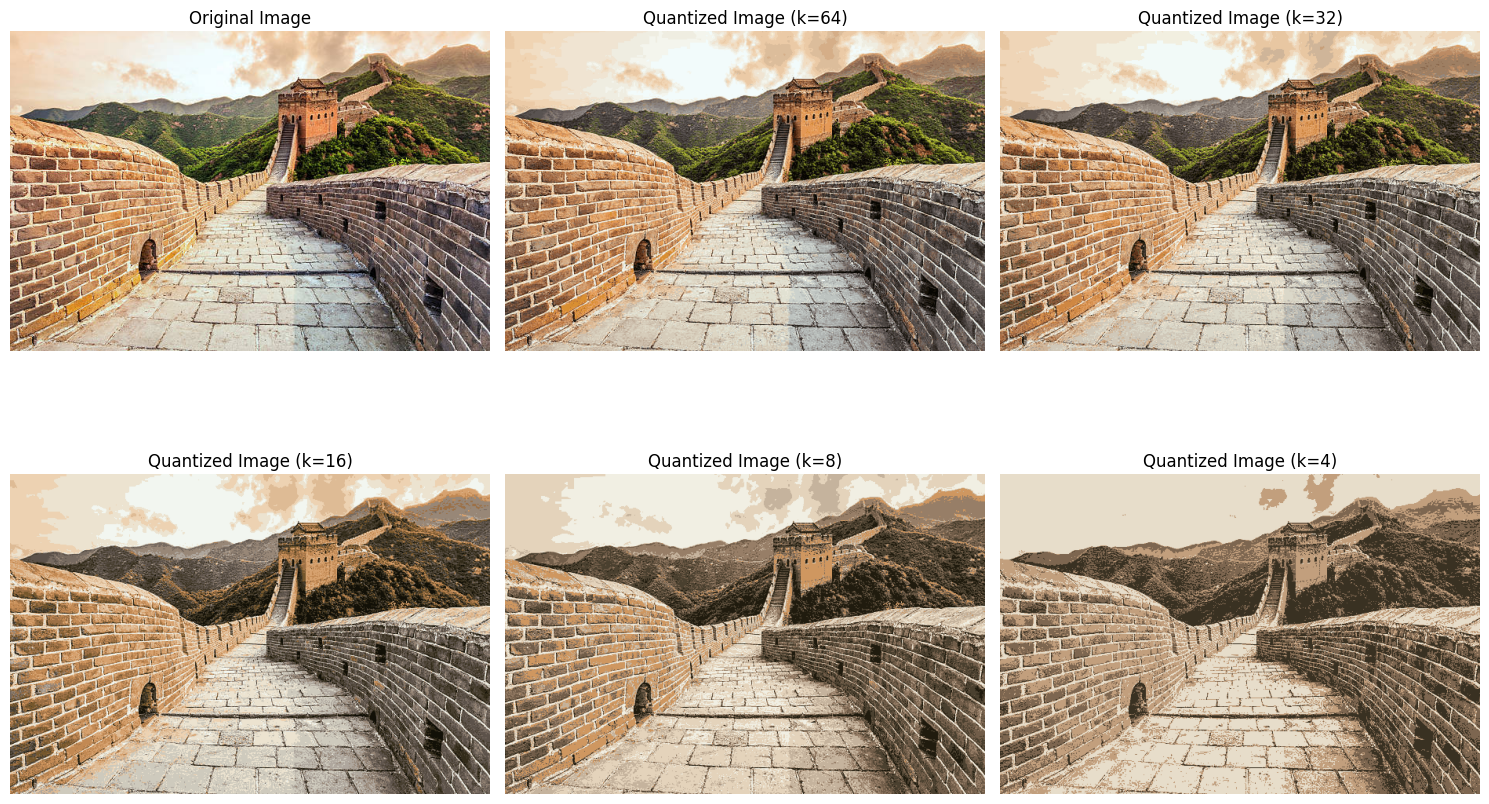

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from skimage import io

def quantize_image(image, k):
    h, w, c = image.shape
    image_reshaped = image.reshape((-1, 3))

    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(image_reshaped)

    centroids = kmeans.cluster_centers_
    labels = kmeans.labels_
    
    quantized_image = centroids[labels].reshape((h, w, c)).astype(np.uint8)
    
    return quantized_image

image_path = 'image1.jpg'  
image = io.imread(image_path)

k_values = [64, 32, 16, 8, 4]
quantized_images = [quantize_image(image, k) for k in k_values]

plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
plt.imshow(image)
plt.title('Original Image')
plt.axis('off')
for i, k in enumerate(k_values):
    plt.subplot(2, 3, i + 2)
    plt.imshow(quantized_images[i])
    plt.title(f'Quantized Image (k={k})')
    plt.axis('off')

plt.tight_layout()
plt.show()
